# Space X Falcon 9 First Stage Landing Success Predictor

### 1. Import Libraries

In [1]:
import pandas as pd

In [2]:
# Load the dataset
spacex_data = pd.read_csv('SpaceX_Falcon9.csv')

# Display the first few rows of the dataset
spacex_data.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


### 2. Data Preprocessing

In [3]:
# Check for missing values
missing_values = spacex_data.isnull().sum()

# Drop the "Unnamed: 0" column as it's just an index
spacex_data_cleaned = spacex_data.drop(columns=['Unnamed: 0'])

# Display missing values per column
missing_values

Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [4]:
# Fill missing values in PayloadMass with the median value
spacex_data_cleaned['PayloadMass'].fillna(spacex_data_cleaned['PayloadMass'].median(), inplace=True)

# Fill missing LandingPad values with 'None'
spacex_data_cleaned['LandingPad'].fillna('None', inplace=True)

# Check to confirm that there are no missing values left
missing_values_after_cleaning = spacex_data_cleaned.isnull().sum()
missing_values_after_cleaning

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

### 3. Exploratory Data Analysis

In [5]:
# Analyze the Outcome variable distribution
outcome_counts = spacex_data_cleaned['Outcome'].value_counts()

# Summary statistics of numeric features
summary_statistics = spacex_data_cleaned.describe()

# Display the Outcome distribution and summary statistics
outcome_counts, summary_statistics

(True ASDS      41
 None None      19
 True RTLS      14
 False ASDS      6
 True Ocean      5
 False Ocean     2
 None ASDS       2
 False RTLS      1
 Name: Outcome, dtype: int64,
        FlightNumber   PayloadMass    Flights      Block  ReusedCount  \
 count     90.000000     90.000000  90.000000  90.000000    90.000000   
 mean      45.500000   6035.295000   1.788889   3.500000     3.133333   
 std       26.124701   4746.241442   1.213172   1.595288     4.097684   
 min        1.000000    350.000000   1.000000   1.000000     0.000000   
 25%       23.250000   2510.750000   1.000000   2.000000     0.000000   
 50%       45.500000   4535.000000   1.000000   4.000000     1.000000   
 75%       67.750000   8912.750000   2.000000   5.000000     4.000000   
 max       90.000000  15600.000000   6.000000   5.000000    12.000000   
 
         Longitude   Latitude  
 count   90.000000  90.000000  
 mean   -86.366477  29.449963  
 std     14.149518   2.141306  
 min   -120.610829  28.561857  

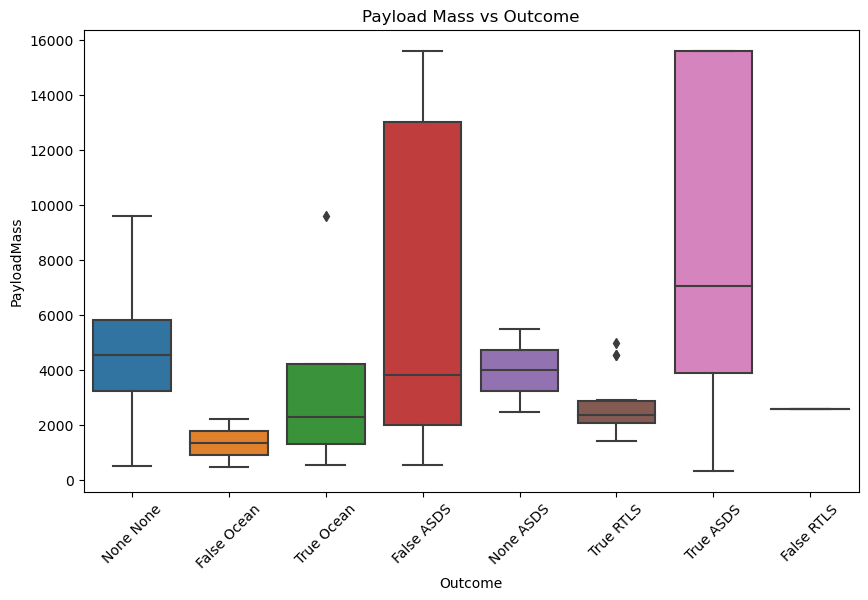

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a plot to visualize PayloadMass vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='PayloadMass', data=spacex_data_cleaned)
plt.title('Payload Mass vs Outcome')
plt.xticks(rotation=45)
plt.show()

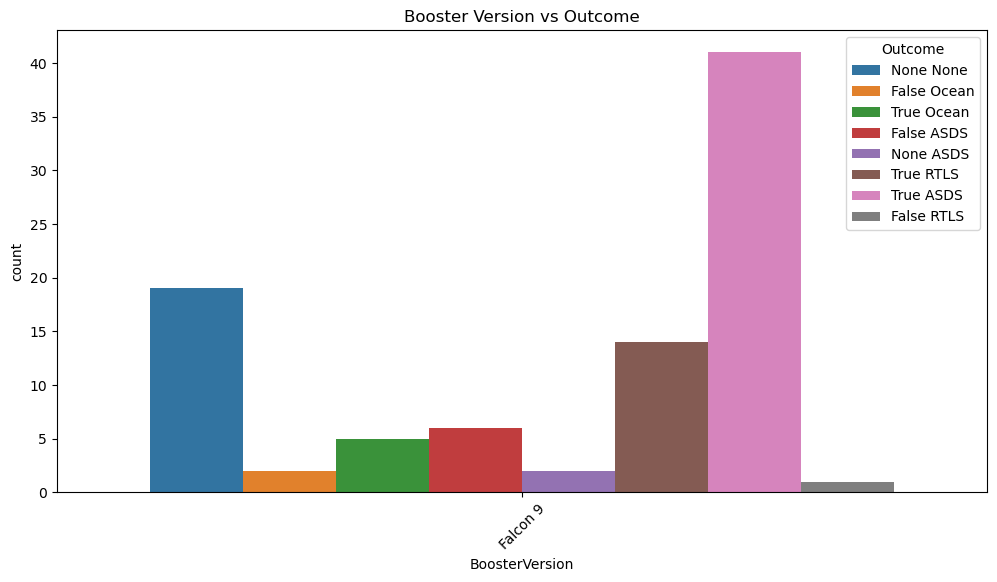

In [7]:
# Create a plot to visualize BoosterVersion vs Outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='BoosterVersion', hue='Outcome', data=spacex_data_cleaned)
plt.title('Booster Version vs Outcome')
plt.xticks(rotation=45)
plt.show()

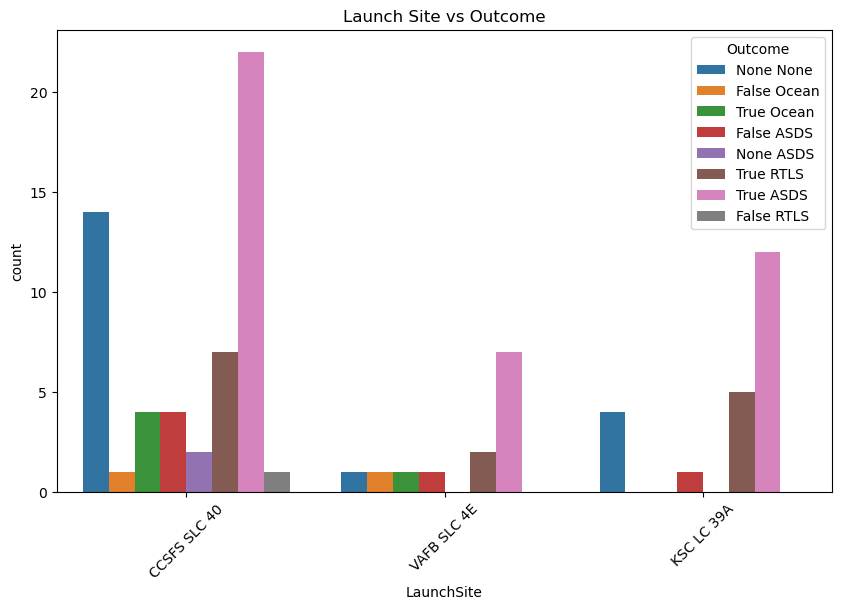

In [8]:
# Create a plot to visualize LaunchSite vs Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='LaunchSite', hue='Outcome', data=spacex_data_cleaned)
plt.title('Launch Site vs Outcome')
plt.xticks(rotation=45)
plt.show()

### 4. Feature Engineering

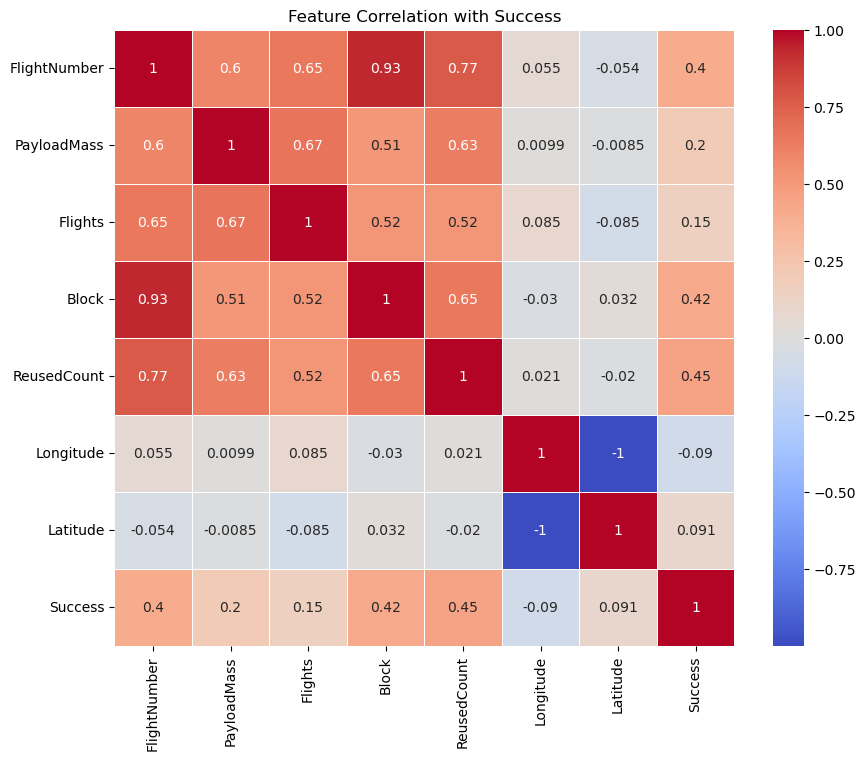

In [9]:
# Convert Outcome to a binary variable (successful landing or not)
# For simplicity, consider only True ASDS, True RTLS as success, others as failure

# Create a new binary target column "Success" where landing is successful (True) or not
spacex_data_cleaned['Success'] = spacex_data_cleaned['Outcome'].apply(
    lambda x: 1 if 'True' in x else 0
)

# Select numerical columns for correlation analysis
numerical_features = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Longitude', 'Latitude']

# Compute the correlation matrix
correlation_matrix = spacex_data_cleaned[numerical_features + ['Success']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation with Success')
plt.show()

## 5. Encoding Categorical Variables

In [10]:
# One-hot encode categorical columns: 'BoosterVersion', 'LaunchSite', 'Orbit'
spacex_data_encoded = pd.get_dummies(spacex_data_cleaned, 
                                     columns=['BoosterVersion', 'LaunchSite', 'Orbit'], 
                                     drop_first=True)

# Display the first few rows of the encoded data
spacex_data_encoded.head()

,FlightNumber,Date,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
0,1,2010-06-04,4535.0,None None,1,False,False,False,None,1.0,...,0,0,0,0,1,0,0,0,0,0
1,2,2012-05-22,525.0,None None,1,False,False,False,None,1.0,...,0,0,0,0,1,0,0,0,0,0
2,3,2013-03-01,677.0,None None,1,False,False,False,None,1.0,...,0,0,0,1,0,0,0,0,0,0
3,4,2013-09-29,500.0,False Ocean,1,False,False,False,None,1.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2013-12-03,3170.0,None None,1,False,False,False,None,1.0,...,0,1,0,0,0,0,0,0,0,0


## 6. Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
spacex_data_encoded[numerical_cols] = scaler.fit_transform(spacex_data_encoded[numerical_cols])

# Display the first few rows of the scaled data
spacex_data_encoded.head()

,FlightNumber,Date,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
0,-1.712912,2010-06-04,-0.317873,None None,-0.653913,False,False,False,None,-1.575895,...,0,0,0,0,1,0,0,0,0,0
1,-1.674419,2012-05-22,-1.167485,None None,-0.653913,False,False,False,None,-1.575895,...,0,0,0,0,1,0,0,0,0,0
2,-1.635927,2013-03-01,-1.135280,None None,-0.653913,False,False,False,None,-1.575895,...,0,0,0,1,0,0,0,0,0,0
3,-1.597434,2013-09-29,-1.172782,False Ocean,-0.653913,False,False,False,None,-1.575895,...,0,0,0,0,0,0,1,0,0,0
4,-1.558942,2013-12-03,-0.607080,None None,-0.653913,False,False,False,None,-1.575895,...,0,1,0,0,0,0,0,0,0,0


## 7. Spliting the Data into Training and Test Sets

In [12]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
X = spacex_data_encoded.drop(columns=['Date', 'Outcome', 'Success'])
y = spacex_data_encoded['Success']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((72, 24), (18, 24), (72,), (18,))

## 8. Training Data Using Machine Learning Algorithms 

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)

# Display the accuracy and confusion matrix
accuracy_logistic, confusion_logistic

ValueError: could not convert string to float: '5e9e3032383ecb6bb234e7ca'

In [14]:
# Drop non-numeric columns that may have been missed earlier, such as "Serial" or other categorical variables
X = X.drop(columns=['LandingPad', 'Serial'])

# Retry splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model again
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_logistic = classification_report(y_test, y_pred_logistic)

# Display the accuracy and confusion matrix
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print("Confusion Matrix:\n", confusion_logistic)
print("Classification Report:\n", classification_logistic)

Logistic Regression Accuracy: 0.9444
Confusion Matrix:
 [[ 3  1]
 [ 0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



C:\Users\Pramo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rf = classification_report(y_test, y_pred_rf)

# Display the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", confusion_rf)
print("Classification Report:\n", classification_rf)

Random Forest Accuracy: 0.8333
Confusion Matrix:
 [[ 3  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.92      0.86      0.89        14

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18



#### Support Vector Machine (SVM) 

In [16]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy and confusion matrix for the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
classification_svm = classification_report(y_test, y_pred_svm)

# Display the results
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Confusion Matrix:\n", confusion_svm)
print("Classification Report:\n", classification_svm)

SVM Accuracy: 0.7778
Confusion Matrix:
 [[ 0  4]
 [ 0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.78      1.00      0.88        14

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18



C:\Users\Pramo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pramo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pramo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gradient Boosting Classifier

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classification_gb = classification_report(y_test, y_pred_gb)

# Display the results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:\n", confusion_gb)
print("Classification Report:\n", classification_gb)

Gradient Boosting Accuracy: 0.8889
Confusion Matrix:
 [[ 4  0]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.92        14

    accuracy                           0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18



#### XGB Classifier

In [19]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_xgb = classification_report(y_test, y_pred_xgb)

# Display the results
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("Confusion Matrix:\n", confusion_xgb)
print("Classification Report:\n", classification_xgb)

XGBoost Accuracy: 0.9444
Confusion Matrix:
 [[ 4  0]
 [ 1 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18



### Visualizing Feature Importance

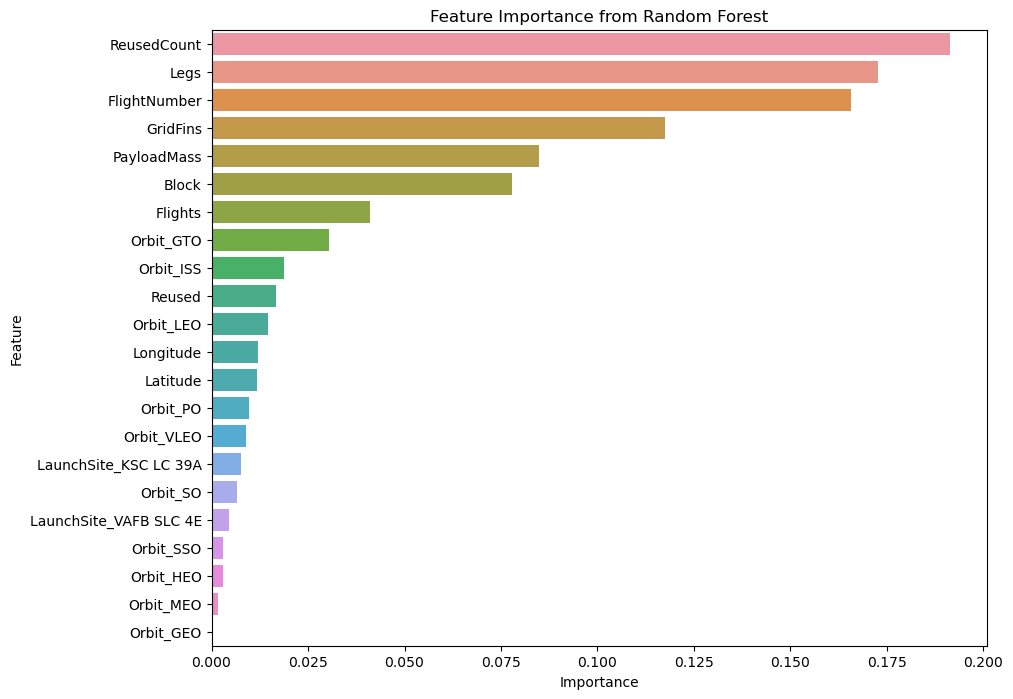

In [20]:
# Train the Random Forest model again to retrieve feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

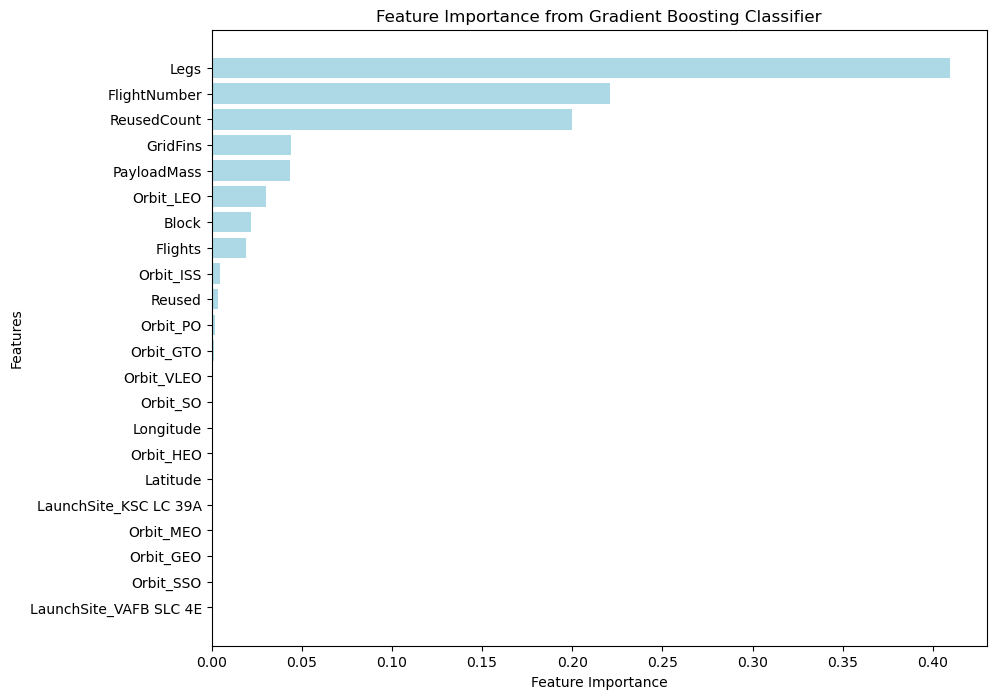

In [21]:
# Get feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## 9. Training Data Using Deep Learning Models

#### Neural Network

In [22]:
!pip install tensorflow

In [23]:
!pip install optree

In [24]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset (replace 'SpaceX_Falcon9.csv' with your dataset path)
data = pd.read_csv('SpaceX_Falcon9.csv')

# Drop unnecessary columns (like 'Serial', as it contains string data)
data = data.drop(['Serial', 'Unnamed: 0'], axis=1)

# Handle non-numeric columns (example: 'Date', 'BoosterVersion', 'Orbit', 'LaunchSite')

# Convert 'Date' column to datetime if needed, then extract relevant parts (Year, Month)
if 'Date' in data.columns:
    data['Year'] = pd.to_datetime(data['Date']).dt.year
    data['Month'] = pd.to_datetime(data['Date']).dt.month
    data = data.drop('Date', axis=1)  # Drop the original Date column

# Apply one-hot encoding to categorical columns (example: 'BoosterVersion', 'Orbit', 'LaunchSite')
data = pd.get_dummies(data, columns=['BoosterVersion', 'Orbit', 'LaunchSite', 'LandingPad'], drop_first=True)

# Preprocessing the data (replace 'Outcome' with the actual target column)
X = data.drop('Outcome', axis=1)  # Drop the target column from features
y = data['Outcome'].apply(lambda x: 1 if 'Success' in x else 0)  # Convert Outcome to binary (Success = 1, Failure = 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (only applied after encoding categorical features and removing non-numeric columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


C:\Users\Pramo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9777 - loss: 0.5292 - val_accuracy: 1.0000 - val_loss: 0.6821
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6794 - val_accuracy: 1.0000 - val_loss: 0.6707
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6681 - val_accuracy: 1.0000 - val_loss: 0.6593
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6567 - val_accuracy: 1.0000 - val_loss: 0.6479
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6453 - val_accuracy: 1.0000 - val_loss: 0.6366
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6340 - val_accuracy: 1.0000 - val_loss: 0.6253
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6226 - val_accuracy: 1.0000 - val_loss: 0.6139
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6112 - val_accuracy: 1.0000 - val_loss: 0.6024
Epoch 9/50


#### Tuning Nueral Network

In [25]:
!pip install keras-tuner

In [26]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the function to build the neural network model
def build_model(hp):
    model = Sequential()
    
    # Tune the number of neurons in the first hidden layer
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))
    
    # Add a second hidden layer
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=128, step=16), activation='relu'))
    
    # Add dropout for regularization
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='tuner_dir',
    project_name='tune_nn'
)

# Run the tuner search to find the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test, y_test)

# Print the accuracy of the tuned model
print(f"Test accuracy: {accuracy}")


Reloading Tuner from tuner_dir\tune_nn\tuner0.json



C:\Users\Pramo\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 1.0000 - loss: 0.6130
Test accuracy: 1.0


### Deep Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the deep neural network model
dnn_model = Sequential()
dnn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(16, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_dnn = dnn_model.predict(X_test)
y_pred_dnn = (y_pred_dnn > 0.5).astype(int)  # Convert probabilities to binary values

# Calculate the accuracy
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3963 - loss: 0.8084 - val_accuracy: 1.0000 - val_loss: 0.6841
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6819 - val_accuracy: 1.0000 - val_loss: 0.6748
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6726 - val_accuracy: 1.0000 - val_loss: 0.6655
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6633 - val_accuracy: 1.0000 - val_loss: 0.6561
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.6539 - val_accuracy: 1.0000 - val_loss: 0.6467
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6445 - val_accuracy: 1.0000 - val_loss: 0.6373
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6351 - val_accuracy: 1.0000 - val_loss: 0.6278
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6256 - val_accuracy: 1.0000 - val_loss: 0.6183
Ep

### Feedforward Neural Network 

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers with Dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% of the neurons dropped

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/100


C:\Users\Pramo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.4616 - loss: 0.7727 - val_accuracy: 1.0000 - val_loss: 0.6853
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.6838 - val_accuracy: 1.0000 - val_loss: 0.6770
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.6755 - val_accuracy: 1.0000 - val_loss: 0.6683
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.6670 - val_accuracy: 1.0000 - val_loss: 0.6594
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.6574 - val_accuracy: 1.0000 - val_loss: 0.6503
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.6493 - val_accuracy: 1.0000 - val_loss: 0.6410
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.6396 - val_accuracy: 1.0000 - val_loss: 0.6315
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.6262 - val_accuracy: 1.0000 - val_loss: 0.6218
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0980 - val_accuracy: 1.0000 - val_loss: 0.0839
Epoch 53/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0853 - val_accuracy: 1.0000 - val_loss: 0.0785
Epoch 54/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0877 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 55/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0737 - val_accuracy: 1.0000 - val_loss: 0.0687
Epoch 56/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0766 - val_accuracy: 1.0000 - val_loss: 0.0644
Epoch 57/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0748 - val_accuracy: 1.0000 - val_loss: 0.0604
Epoch 58/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0682 - val_accuracy: 1.0000 - val_loss: 0.0567
Epoch 59/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0673 - val_accuracy: 1.0000 - val_loss: 0.05

#### LSTM

## CNN-LSTM

In [29]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset (replace 'SpaceX_Falcon9.csv' with your dataset path)
data = pd.read_csv('SpaceX_Falcon9.csv')

# Drop unnecessary columns (like 'Serial', as it contains string data)
data = data.drop(['Serial', 'Unnamed: 0'], axis=1)

# Handle non-numeric columns (example: 'Date', 'BoosterVersion', 'Orbit', 'LaunchSite')

# Convert 'Date' column to datetime if needed, then extract relevant parts (Year, Month)
if 'Date' in data.columns:
    data['Year'] = pd.to_datetime(data['Date']).dt.year
    data['Month'] = pd.to_datetime(data['Date']).dt.month
    data = data.drop('Date', axis=1)  # Drop the original Date column

# Apply one-hot encoding to categorical columns (example: 'BoosterVersion', 'Orbit', 'LaunchSite')
data = pd.get_dummies(data, columns=['BoosterVersion', 'Orbit', 'LaunchSite', 'LandingPad'], drop_first=True)

# Preprocessing the data (replace 'Outcome' with the actual target column)
X = data.drop('Outcome', axis=1)  # Drop the target column from features
y = data['Outcome'].apply(lambda x: 1 if 'Success' in x else 0)  # Convert Outcome to binary (Success = 1, Failure = 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (only applied after encoding categorical features and removing non-numeric columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to 3D for Conv1D (samples, time steps, features)
# Assuming each row in the dataset is one "sample" and the columns are "features"
X_train_cnn_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, time steps=features, 1)
X_test_cnn_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model (Conv1D)
model = Sequential()

# Add Conv1D layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn_lstm.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten before feeding into Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_cnn_lstm, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


C:\Users\Pramo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.6891 - loss: 293403673535012264801731472680550400.0000 - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 9/50
2/2 ━━━━━

In [30]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, BatchNormalization, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset (replace 'SpaceX_Falcon9.csv' with your dataset path)
data = pd.read_csv('SpaceX_Falcon9.csv')

# Drop unnecessary columns (like 'Serial', as it contains string data)
data = data.drop(['Serial', 'Unnamed: 0'], axis=1)

# Handle non-numeric columns (example: 'Date', 'BoosterVersion', 'Orbit', 'LaunchSite')

# Convert 'Date' column to datetime if needed, then extract relevant parts (Year, Month)
if 'Date' in data.columns:
    data['Year'] = pd.to_datetime(data['Date']).dt.year
    data['Month'] = pd.to_datetime(data['Date']).dt.month
    data = data.drop('Date', axis=1)  # Drop the original Date column

# Apply one-hot encoding to categorical columns (example: 'BoosterVersion', 'Orbit', 'LaunchSite')
data = pd.get_dummies(data, columns=['BoosterVersion', 'Orbit', 'LaunchSite', 'LandingPad'], drop_first=True)

# Preprocessing the data (replace 'Outcome' with the actual target column)
X = data.drop('Outcome', axis=1)  # Drop the target column from features
y = data['Outcome'].apply(lambda x: 1 if 'Success' in x else 0)  # Convert Outcome to binary (Success = 1, Failure = 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (only applied after encoding categorical features and removing non-numeric columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to 3D for Conv1D (samples, time steps, features)
# Assuming each row in the dataset is one "sample" and the columns are "features"
X_train_cnn_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, time steps=features, 1)
X_test_cnn_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN-LSTM model with Dropout and Batch Normalization
model = Sequential()

# 1D Convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn_lstm.shape[1], 1)))  # Features as the time steps
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=1))

# LSTM layer
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_cnn_lstm, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


C:\Users\Pramo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 1.0000 - loss: 0.6930 - val_accuracy: 1.0000 - val_loss: 0.6921
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.6920 - val_accuracy: 1.0000 - val_loss: 0.6911
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.6910 - val_accuracy: 1.0000 - val_loss: 0.6902
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.6900 - val_accuracy: 1.0000 - val_loss: 0.6892
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.6890 - val_accuracy: 1.0000 - val_loss: 0.6882
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.6880 - val_accuracy: 1.0000 - val_loss: 0.6872
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.6870 - val_accuracy: 1.0000 - val_loss: 0.6862
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.6860 - val_accuracy: 1.0000 - val_loss: 0.6852
Epoch 9/50

#### Hyperparameter Tuning with Keras Tuner: (CNN-LSTM)

In [31]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [32]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Tuning the number of Conv1D filters
    model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Int('kernel_size', 2, 5), 
                     activation='relu', 
                     input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])))
    
    model.add(MaxPooling1D(pool_size=hp.Int('pool_size', 1, 3)))

    # Tuning the number of LSTM units
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=100, step=32), 
                   activation='relu', return_sequences=False))

    # Fully connected layer
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))

    # Dropout layer to avoid overfitting
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with a tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize Keras Tuner with Hyperband search algorithm
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='cnn_lstm_tuning',
                     project_name='cnn_lstm')

# Perform the search
tuner.search(X_train_cnn_lstm, y_train, epochs=50, validation_split=0.2)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, accuracy_cnn_lstm = best_model.evaluate(X_test_cnn_lstm, y_test)
print(f"Best model test accuracy: {accuracy_cnn_lstm}")


Reloading Tuner from cnn_lstm_tuning\cnn_lstm\tuner0.json


C:\Users\Pramo\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 1.0000 - loss: 0.6921
Best model test accuracy: 1.0


### Integrate CNN-LSTM into Keras Tuner

In [33]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to build the CNN-LSTM model with hyperparameters
def build_model(hp):
    model = Sequential()

    # Convolutional layer
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),  # Tune the number of filters
        kernel_size=hp.Int('kernel_size', 2, 5),  # Tune the kernel size
        activation='relu', 
        input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])  # Input shape for CNN-LSTM
    ))
    
    # MaxPooling layer
    model.add(MaxPooling1D(pool_size=hp.Int('pool_size', 1, 3)))  # Tune pooling size
    
    # LSTM layer
    model.add(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=100, step=32),  # Tune the LSTM units
        activation='relu'
    ))
    
    # Fully connected layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),  # Tune Dense layer units
        activation='relu'
    ))
    
    # Dropout for regularization
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))  # Tune dropout rate
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),  # Tune learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [34]:
# Initialize the tuner
tuner = kt.Hyperband(
    build_model,  # The model-building function
    objective='val_accuracy',  # Objective to optimize (validation accuracy)
    max_epochs=50,  # Maximum number of epochs to train
    factor=3,  # Reduces the number of configurations evaluated over time
    directory='cnn_lstm_tuning',  # Directory to store logs and checkpoints
    project_name='cnn_lstm_project'  # Name of the project
)

# Summary of the search space
tuner.search_space_summary()


Reloading Tuner from cnn_lstm_tuning\cnn_lstm_project\tuner0.json
Search space summary
Default search space size: 7
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
pool_size (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [35]:
# Perform the search for the best hyperparameters
tuner.search(X_train_cnn_lstm, y_train, 
             epochs=50,  # Number of epochs to train
             batch_size=32,  # Batch size
             validation_split=0.2,  # Validation split for tuning
             verbose=1)


In [36]:
# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test_cnn_lstm, y_test)
print(f"Best model test accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 1.0000 - loss: 0.6921
Best model test accuracy: 1.0


In [37]:
# Save the best model
best_model.save('best_cnn_lstm_model.h5')

# To load the model later
from tensorflow.keras.models import load_model
loaded_model = load_model('best_cnn_lstm_model.h5')


## 10. Finding The Best Model

In [39]:
# Initialize a dictionary to store the accuracies of each model
model_accuracies = {}

# Logistic Regression accuracy
logistic_accuracy = accuracy_logistic
model_accuracies['Logistic Regression'] = logistic_accuracy

# Random Forest accuracy
rf_accuracy = accuracy_rf
model_accuracies['Random Forest'] = rf_accuracy


# SVM accuracy
svm_accuracy = accuracy_svm
model_accuracies['SVM'] = svm_accuracy

# XGB Classifier accuracy
xgb_accuracy = accuracy_xgb
model_accuracies['XBG'] = xgb_accuracy

# Deep Learning (Feedforward Neural Network) accuracy
dnn_accuracy = accuracy_dnn  
model_accuracies['Feedforward Neural Network'] = dnn_accuracy

# CNN-LSTM accuracy
cnn_lstm_accuracy = accuracy_cnn_lstm  
model_accuracies['CNN-LSTM'] = cnn_lstm_accuracy

# Print the accuracies of each model
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Find the best model based on accuracy
# best_model_name = max(model_accuracies, key=model_accuracies.get)
# best_model_accuracy = model_accuracies[best_model_name]

# print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


Logistic Regression: 0.9444
Random Forest: 0.8333
SVM: 0.7778
XBG: 0.9444
Feedforward Neural Network: 1.0000
CNN-LSTM: 1.0000


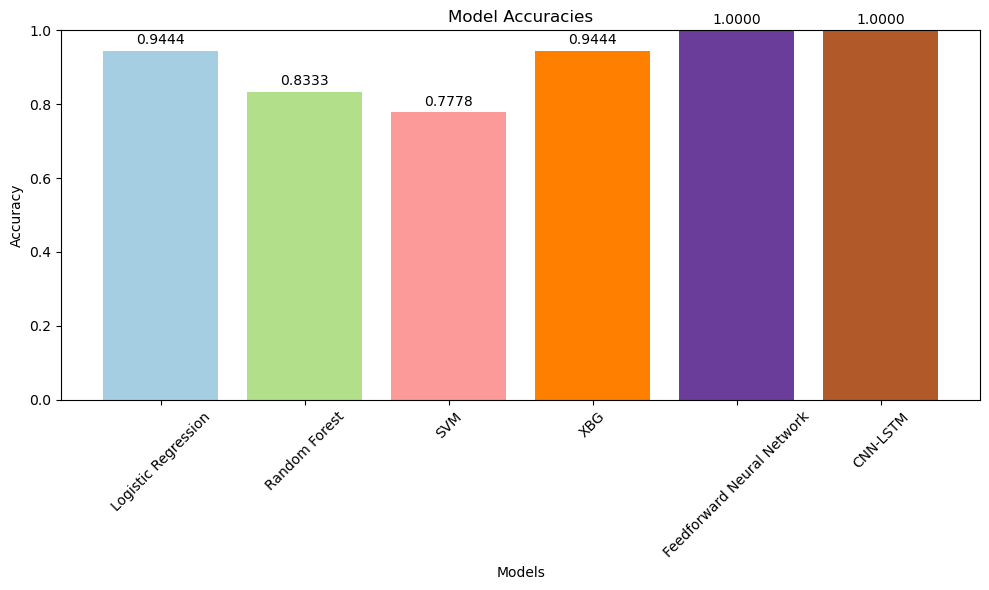

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_accuracies is already defined
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Define a color for each bar
colors = plt.cm.Paired(np.linspace(0, 1, len(model_names)))

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{accuracy:.4f}", ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


### Save The Model

In [40]:
# Assuming the feedforward neural network model is called 'dnn_model'
dnn_model.save('best_dnn_model.h5')

print("Feedforward Neural Network model saved as 'best_dnn_model.h5'.")


Feedforward Neural Network model saved as 'best_dnn_model.h5'.


In [44]:
import pickle

# Create a dictionary with model path and other pipeline components if needed
pipeline = {
    "model_path": 'best_cnn_lstm_model.h5',
}

# Save the pipeline dictionary with pickle
with open('bestmodel.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
    
print("CNN-LSTM Model saved as 'bestmodel.pkl'.")

CNN-LSTM Model saved as 'bestmodel.pkl'.
